## **Exercício 12: Sistema de Envio de Emails com Dados Turísticos em JSON**

*Queremos montar um sistema que envie emails com os pontos turísticos de cidades num roteiro de viagem.*

*Com base no Exercício 11, altere o prompt para estruturar a saída em formato JSON, com descrições e número de visitantes.*

*Crie um notebook que use a biblioteca pandas para converter esse JSON para dataframe e plot um único gráfico de barras horizontais com todos os pontos turísticos, destacando as cores das barras de acordo com a cidade do ponto turístico (Coliseu, em Roma deve ter uma cor diferente que Parthenon, em Atenas).* 

*Coloque as legendas no gráfico.*

In [1]:
import google.generativeai as genai
from dotenv import load_dotenv
import os

load_dotenv('../.env')

genai.configure(api_key=os.environ['GEMINI_KEY'])

modelo = genai.GenerativeModel('gemini-1.5-flash')

In [2]:
import yaml

modelo = genai.GenerativeModel('gemini-1.5-flash')

with open('../Dados/roteiro.yaml', 'r') as arquivo:
    roteiro = yaml.safe_load(arquivo)

pergunta_json = f"""
Seguindo o formato do arquivo YAML abaixo, crie um arquivo em formato JSON que 
liste 3 pontos turísticos de CADA CIDADE , incluindo uma breve descrião e número anual de visitantes para cada.
Exiba somente o conteúdo do arquivo JSON em si, sem a necessidade de escrever '''json'''.

Exemplo (ainda sem as chaves e colchetes de um JSON):

"roteiro": 
      "cidade": "Rio de Janeiro",
      "pontos_turisticos": 
          "nome": "Praia de Copacabana",
          "descricao": "Uma das praias mais bonitas do mundo",
          "visitantes_anuais": "3 milhões de visitantes"

Aqui estão os dados originais:

{roteiro}
"""

resposta_json = modelo.generate_content(pergunta_json)

In [3]:
# SALVANDO O ARQUIVO JSON

import json

dados_json = json.loads(resposta_json.text)

with open('../Dados/roteiro.json', 'w', encoding='utf-8') as arquivo:
    json.dump(dados_json, arquivo, ensure_ascii=False, indent=4)

In [4]:
# TRANSFORMANDO EM UM DATAFRAME DO PANDAS

import pandas as pd

with open('../Dados/roteiro.json', 'r', encoding='utf-8') as arquivo:
    dados_json = json.load(arquivo)

roteiro_df = pd.json_normalize(dados_json['roteiro'],
                               record_path=['pontos_turisticos'],
                               meta=['cidade']
                               )

In [5]:
roteiro_df['visitantes_anuais_num'] = roteiro_df['visitantes_anuais'].apply(lambda x: float(x.split()[0]) * 1_000_000)

In [6]:
roteiro_df

,nome,descricao,visitantes_anuais,cidade,visitantes_anuais_num
0,Acropolis,"Um dos monumentos mais famosos do mundo, com v...",7 milhões de visitantes,Atenas,7000000.0
1,Partenon,"Um templo antigo dedicado à deusa Atena, a deu...",6 milhões de visitantes,Atenas,6000000.0
2,Museu da Acrópole,Um museu com uma coleção de artefatos da Acróp...,1.5 milhões de visitantes,Atenas,1500000.0
3,Coliseu,"Um anfiteatro romano antigo, um dos monumentos...",7.5 milhões de visitantes,Roma,7500000.0
4,Fórum Romano,O centro da vida política e social da Roma ant...,4 milhões de visitantes,Roma,4000000.0
5,Museus Vaticanos,"Um complexo de museus e galerias de arte, incl...",6 milhões de visitantes,Roma,6000000.0


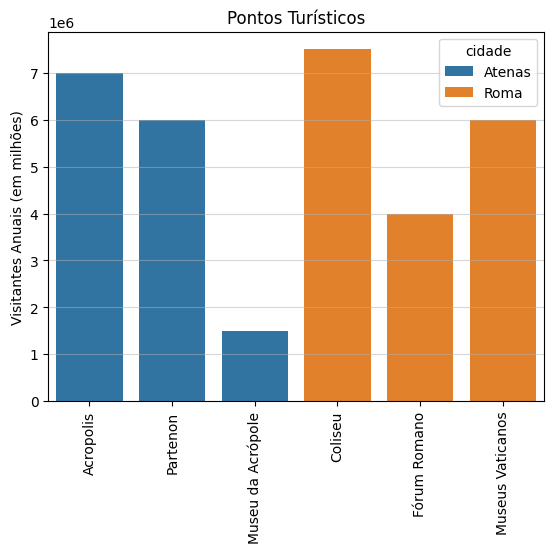

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=roteiro_df, x='nome', y='visitantes_anuais_num', hue='cidade')

plt.title('Pontos Turísticos')
plt.ylabel('Visitantes Anuais (em milhões)')
plt.xlabel('')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.5)
plt.show()